In [419]:
import wave
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import math

In [420]:
FRAME_DURATION = 20        # frame duration in ms
ZCR_SILENCE_THRESHOLD = 0.5
VOLUME_SILENCE_THRESHOLD = 0.02
#INPUT_FILE = 'aba_1.wav'   # file to read from
INPUT_FILE = 'zdanie_3.wav'   # file to read from

In [421]:
def plot(values, y_label, y_lim=None, silent_frames=None):
    time = np.linspace(0, duration, len(values))
    print(time)
    # Set the figure size
    plt.figure(figsize=(20, 5))

    # Plot the amplitude over time
    if silent_frames is not None:
        # Plot silent frames in red
        plt.plot(time[silent_frames], values[silent_frames], 'r')
        # Plot non-silent frames in blue
        plt.plot(time[~silent_frames], values[~silent_frames], 'b')
    else:
        plt.plot(time, values)

    plt.xlabel('Time (ms)')
    plt.ylabel(str(y_label))

    if (y_lim != None):
        plt.ylim(y_lim)
    
    plt.show()

In [422]:
def plot2(values, y_label,  y_lim, segment_colors):
    time = np.linspace(0, duration, len(all_samples))
    segments = []
    counter = 0
    for frame in values:
        segment = []
        for sample in frame:
            segment.append([time[counter], sample])
            counter += 1
        segments.append(segment)
    colors = []
    for isRed in segment_colors:
        colors.append('red' if isRed == True else 'blue')
    lines = LineCollection(segments, colors=colors)

    # plot the LineCollection
    fig, ax = plt.subplots()
    ax.add_collection(lines)

    # set limits for the plot
    ax.autoscale_view()

    ax.figure.set_size_inches(20, 5)
    if (y_lim != None):
        ax.set_ylim(y_lim)
    
    ax.set_ylabel(y_label)

    plt.show()

In [423]:
def divide_into_chunks(list, chunk_size):
    for i in range(0, len(list), chunk_size):
        yield list[i:i + chunk_size]

## File reading and splitting into frames

In [424]:
with wave.open(INPUT_FILE, 'rb') as wav_file:
    # read all samples into a list
    sample_rate = wav_file.getframerate()
    bytes = wav_file.readframes(sample_rate)
    duration = (wav_file.getnframes() / float(sample_rate)) * 1000
    all_samples = np.frombuffer(bytes, dtype=np.int16) / 32768.0

    # split the audio into frames of specified duration
    frame_size = int(sample_rate * FRAME_DURATION / 1000)
    all_frames = list(divide_into_chunks(all_samples, frame_size))

## Amplitude in time

[0.00000000e+00 1.21917695e-01 2.43835391e-01 ... 2.68791943e+03
 2.68804135e+03 2.68816327e+03]


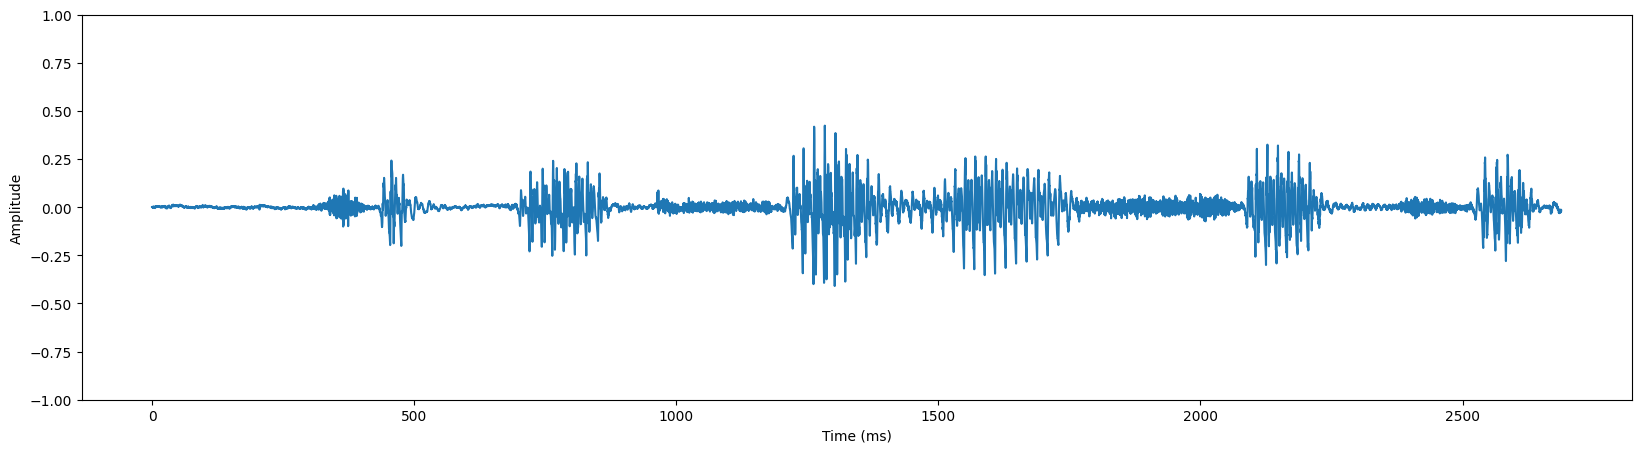

In [425]:
plot(all_samples, 'Amplitude', [-1, 1])

## Volume

[   0.           54.8604748   109.7209496   164.58142441  219.44189921
  274.30237401  329.16284881  384.02332362  438.88379842  493.74427322
  548.60474802  603.46522282  658.32569763  713.18617243  768.04664723
  822.90712203  877.76759683  932.62807164  987.48854644 1042.34902124
 1097.20949604 1152.06997085 1206.93044565 1261.79092045 1316.65139525
 1371.51187005 1426.37234486 1481.23281966 1536.09329446 1590.95376926
 1645.81424406 1700.67471887 1755.53519367 1810.39566847 1865.25614327
 1920.11661808 1974.97709288 2029.83756768 2084.69804248 2139.55851728
 2194.41899209 2249.27946689 2304.13994169 2359.00041649 2413.8608913
 2468.7213661  2523.5818409  2578.4423157  2633.3027905  2688.16326531]


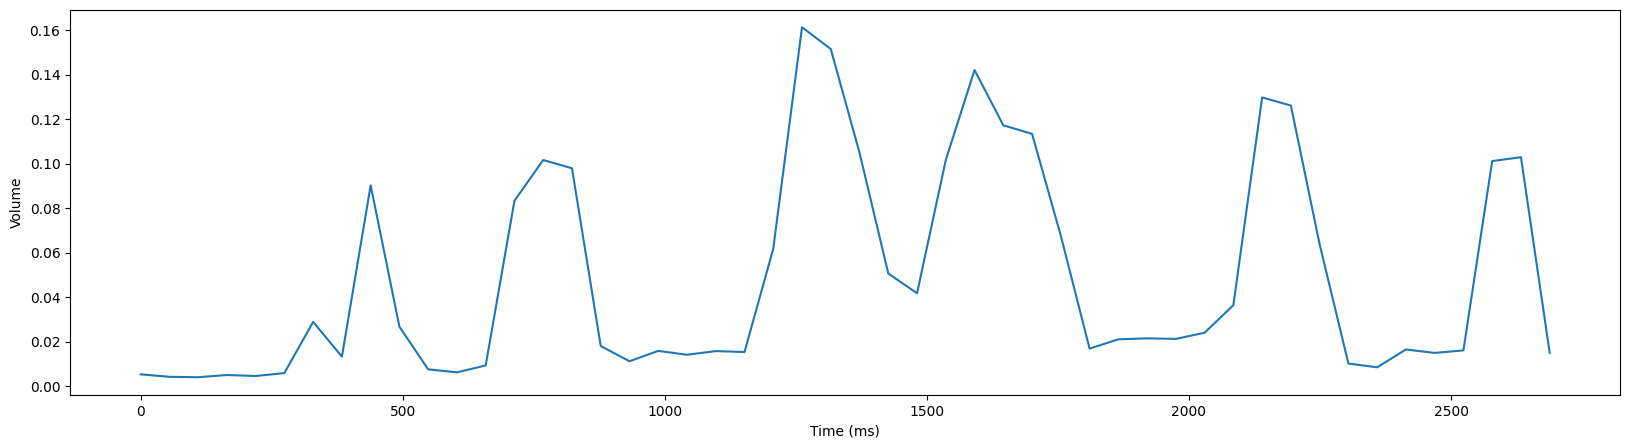

Volume average: 0.04884


In [426]:
volume = []

for frame in all_frames:
    sum = 0
    for sample in frame:
        sum += math.pow(sample, 2)
    volume.append(np.sqrt(sum / frame_size))

plot(volume, 'Volume')
print(f'Volume average: {np.round(np.average(volume), 5)}')

## Short time energy

[   0.           54.8604748   109.7209496   164.58142441  219.44189921
  274.30237401  329.16284881  384.02332362  438.88379842  493.74427322
  548.60474802  603.46522282  658.32569763  713.18617243  768.04664723
  822.90712203  877.76759683  932.62807164  987.48854644 1042.34902124
 1097.20949604 1152.06997085 1206.93044565 1261.79092045 1316.65139525
 1371.51187005 1426.37234486 1481.23281966 1536.09329446 1590.95376926
 1645.81424406 1700.67471887 1755.53519367 1810.39566847 1865.25614327
 1920.11661808 1974.97709288 2029.83756768 2084.69804248 2139.55851728
 2194.41899209 2249.27946689 2304.13994169 2359.00041649 2413.8608913
 2468.7213661  2523.5818409  2578.4423157  2633.3027905  2688.16326531]


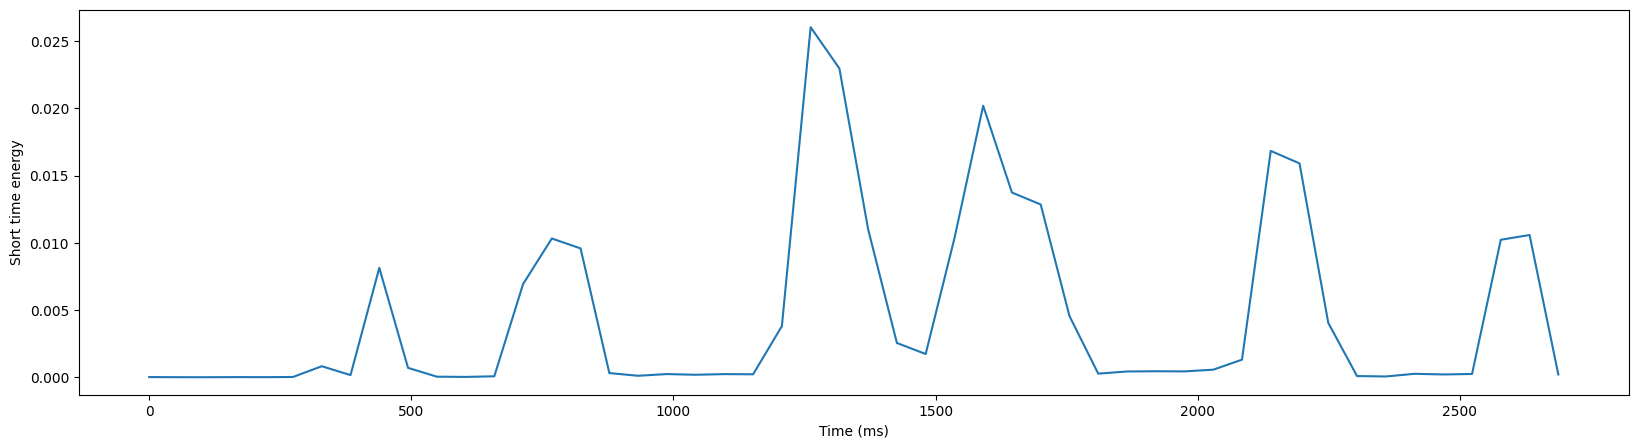

Short time energy average: 0.00461


In [427]:
short_time_energy = np.power(volume, 2)

plot(short_time_energy, 'Short time energy')
print(f'Short time energy average: {np.round(np.average(short_time_energy), 5)}')

## Zero crossing rate

[   0.           54.8604748   109.7209496   164.58142441  219.44189921
  274.30237401  329.16284881  384.02332362  438.88379842  493.74427322
  548.60474802  603.46522282  658.32569763  713.18617243  768.04664723
  822.90712203  877.76759683  932.62807164  987.48854644 1042.34902124
 1097.20949604 1152.06997085 1206.93044565 1261.79092045 1316.65139525
 1371.51187005 1426.37234486 1481.23281966 1536.09329446 1590.95376926
 1645.81424406 1700.67471887 1755.53519367 1810.39566847 1865.25614327
 1920.11661808 1974.97709288 2029.83756768 2084.69804248 2139.55851728
 2194.41899209 2249.27946689 2304.13994169 2359.00041649 2413.8608913
 2468.7213661  2523.5818409  2578.4423157  2633.3027905  2688.16326531]


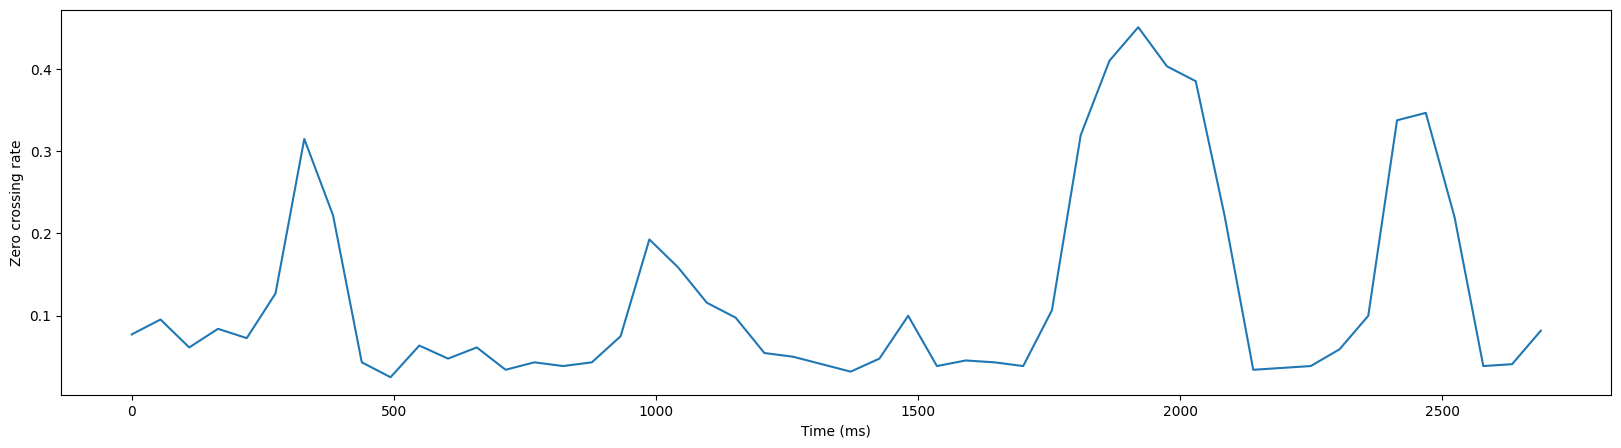

Short time energy average: 0.12431


In [428]:
zero_crossing_rate = []

for frame in all_frames:
    sum = 0
    for i in range(1, len(frame)):
        sum += np.abs(np.sign(frame[i]) - np.sign(frame[i - 1]))
    sum = sum / (2 * frame_size)
    zero_crossing_rate.append(sum)

plot(zero_crossing_rate, 'Zero crossing rate')
print(f'Short time energy average: {np.round(np.average(zero_crossing_rate), 5)}')

## Silence detection

[[[0.0, 0.00140380859375], [0.12191769537421754, 0.00177001953125], [0.24383539074843508, 0.000946044921875], [0.3657530861226526, -0.00067138671875], [0.48767078149687015, -3.0517578125e-05], [0.6095884768710877, -0.00048828125], [0.7315061722453052, 0.0001220703125], [0.8534238676195227, -0.000762939453125], [0.9753415629937403, 0.001708984375], [1.097259258367958, -0.00018310546875], [1.2191769537421755, 0.001708984375], [1.3410946491163929, 0.001922607421875], [1.4630123444906105, 0.001312255859375], [1.584930039864828, 0.000579833984375], [1.7068477352390454, 0.0015869140625], [1.828765430613263, 0.00079345703125], [1.9506831259874806, -0.000518798828125], [2.072600821361698, -0.001129150390625], [2.194518516735916, -0.000213623046875], [2.3164362121101334, -0.000396728515625], [2.438353907484351, -0.000762939453125], [2.560271602858568, -0.00048828125], [2.6821892982327857, 0.0010986328125], [2.8041069936070033, 0.001190185546875], [2.926024688981221, 0.003875732421875], [3.04794

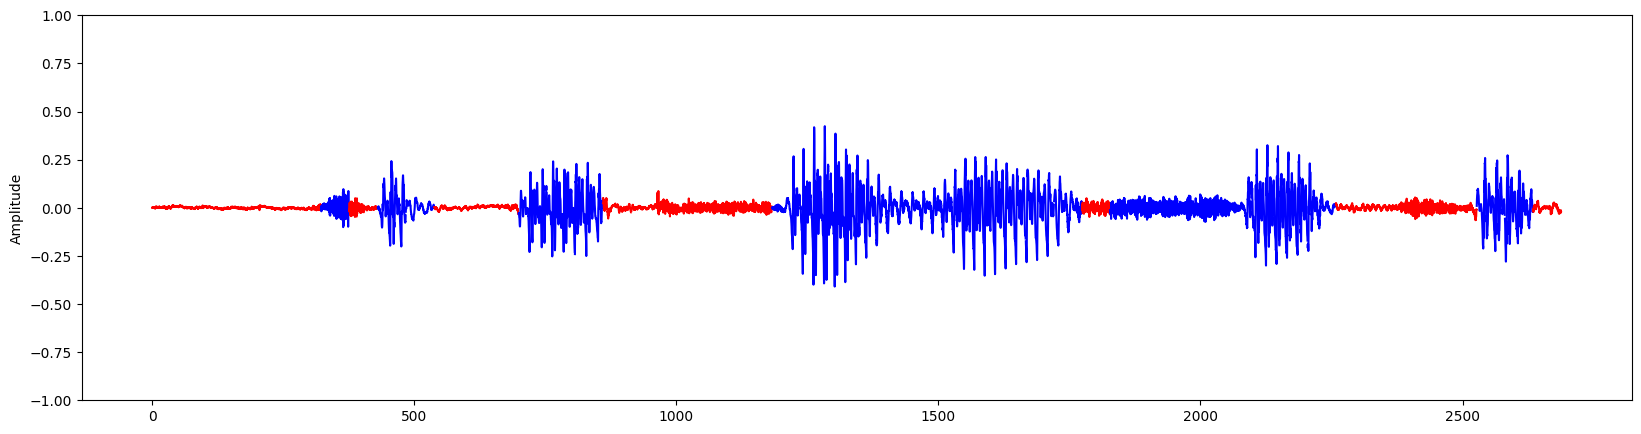

In [429]:
silent_frames = []
for i in range(len(all_frames)):
    if (volume[i] < VOLUME_SILENCE_THRESHOLD and zero_crossing_rate[i] < ZCR_SILENCE_THRESHOLD):
        silent_frames.append(True)
    else:
        silent_frames.append(False)

plot2(all_frames, 'Amplitude', [-1, 1], np.array(silent_frames))

## Fundamental frequency

[   0.           54.8604748   109.7209496   164.58142441  219.44189921
  274.30237401  329.16284881  384.02332362  438.88379842  493.74427322
  548.60474802  603.46522282  658.32569763  713.18617243  768.04664723
  822.90712203  877.76759683  932.62807164  987.48854644 1042.34902124
 1097.20949604 1152.06997085 1206.93044565 1261.79092045 1316.65139525
 1371.51187005 1426.37234486 1481.23281966 1536.09329446 1590.95376926
 1645.81424406 1700.67471887 1755.53519367 1810.39566847 1865.25614327
 1920.11661808 1974.97709288 2029.83756768 2084.69804248 2139.55851728
 2194.41899209 2249.27946689 2304.13994169 2359.00041649 2413.8608913
 2468.7213661  2523.5818409  2578.4423157  2633.3027905  2688.16326531]


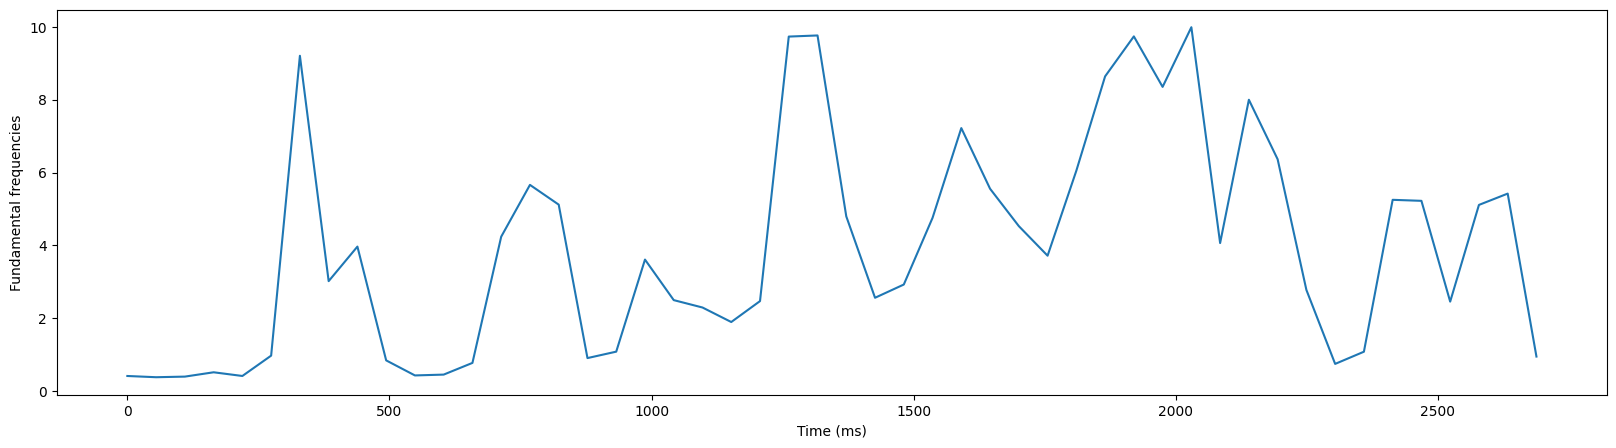

Fundamental frequency average: 3.94949


In [430]:
fundamental_frequencies = []
lag = 1

for frame in all_frames:
    sum = 0
    for j in range(len(frame) - lag - 1):
        sum += np.abs(frame[j + lag] - frame[j])
    fundamental_frequencies.append(sum)

plot(fundamental_frequencies, 'Fundamental frequencies')
print(f'Fundamental frequency average: {np.round(np.average(fundamental_frequencies), 5)}')